In [55]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import random
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
! ls ../

archieve			      __pycache__
common.py			      README.md
db_op.ipynb			      snapshot_distribution.ipynb
distribution.ipynb		      snapshot_distribution_long_term.ipynb
evaluation-wiki.ipynb		      snapshot.ipynb
gbdt.ipynb			      snapshot-key.ipynb
interactive_plot_example-Copy1.ipynb  tmp.csv
long_term_feature.ipynb		      tmp.ipynb
lr.ipynb			      Untitled.ipynb


In [83]:
max_n_past_timestamps = 64

In [192]:
fields = ['f', 'i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]
x_fields = ['i0'] + [f'd{i}' for i in range(1, 4)]
x_fields = ['i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]
y_field = ['f']

In [221]:
df = pd.read_csv('/data/zhenyus/webcachesim/snapshot_1.log', delimiter=',', names=fields)
# df = pd.read_csv('/data/zhenyus/webcachesim/snapshot_0.log', delimiter=',', names=fields)

In [222]:
len(df)

2014944

In [223]:
rest = 2014944

In [235]:
nc = []
for i in [f'd{i}' for i in range(1, max_n_past_timestamps)]:
    nc.append(np.sum(pd.isna(df[i])))

In [236]:
a = np.array(nc)

In [246]:
(a/2014944).round(3)

array([0.615, 0.152, 0.069, 0.039, 0.025, 0.017, 0.013, 0.01 , 0.008,
       0.006, 0.005, 0.004, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [244]:
np.divide(a[1:], a[:-1])

array([0.24660979, 0.45372895, 0.56681888, 0.63627455, 0.69212305,
       0.73614242, 0.76413317, 0.78709412, 0.79184073, 0.81691534,
       0.83067608, 0.83187561, 0.85061332, 0.86145923, 0.8901953 ,
       0.87508395, 0.90406754, 0.91482739, 0.87813177, 0.88446636,
       0.84468339, 0.96228194, 0.900049  , 0.91344584, 0.9022646 ,
       0.92998679, 0.95809659, 0.82876205, 0.94186047, 0.98955366,
       0.95009597, 0.86363636, 1.00116959, 0.88317757, 1.02248677,
       0.87839586, 0.94108984, 0.94053208, 0.93011647, 0.94812165,
       0.88867925, 0.99363057, 1.03632479, 0.94845361, 0.82391304,
       1.02638522, 0.95372751, 1.0458221 , 0.84536082, 0.95121951,
       0.87820513, 1.09124088, 1.04013378, 0.93890675, 0.90068493,
       0.97718631, 0.90272374, 1.02155172, 1.05485232, 0.92      ,
       0.92173913, 0.90566038])

In [238]:
a[1:] =  a[1:] - a[:-1]

Text(0.5, 1.0, 'cdf of object with x timestamp in the window')

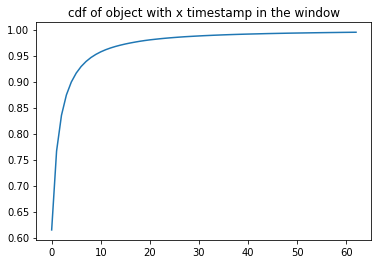

In [249]:
plt.plot(np.cumsum(a/2014944))
plt.title('cdf of object with x timestamp in the window')

In [251]:
np.cumsum(a/2014944).round(4)

array([0.6148, 0.7665, 0.8353, 0.8743, 0.8991, 0.9162, 0.9289, 0.9385,
       0.9461, 0.9522, 0.9571, 0.9612, 0.9646, 0.9675, 0.9699, 0.9722,
       0.9741, 0.9759, 0.9775, 0.9789, 0.9801, 0.9812, 0.9822, 0.9831,
       0.9839, 0.9847, 0.9854, 0.986 , 0.9866, 0.9871, 0.9876, 0.9881,
       0.9886, 0.989 , 0.9894, 0.9897, 0.9901, 0.9904, 0.9907, 0.991 ,
       0.9912, 0.9915, 0.9917, 0.9919, 0.9922, 0.9924, 0.9925, 0.9927,
       0.9929, 0.9931, 0.9932, 0.9934, 0.9935, 0.9937, 0.9938, 0.994 ,
       0.9941, 0.9942, 0.9943, 0.9944, 0.9946, 0.9947, 0.9948])

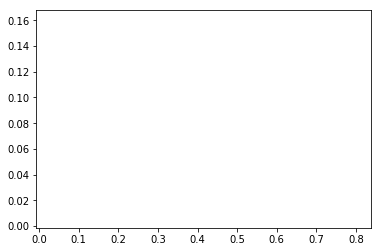

In [241]:
plt.plot(0.8, 0.8*0.2, 0.8*0.2*0.2, 0.8*0.2*0.2*0.2)

In [194]:
df = df[~pd.isna(df.d1)].reset_index()

In [195]:
df.head()

,index,f,i0,d1,d2,d3,d4,d5,d6,d7,...,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63
0,0,63.0,1642,391.0,80.0,177.0,477.0,952.0,46.0,918.0,...,46.0,8.0,157.0,73.0,32.0,59.0,205.0,30.0,12.0,57.0
1,1,127.0,12,73.0,488.0,30.0,277.0,284.0,129.0,2.0,...,29.0,32.0,26.0,78.0,24.0,32.0,65.0,73.0,39.0,9.0
2,2,230285.0,226052,3125643.0,302490.0,99125.0,1803092.0,434359.0,27183.0,3421939.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,463297.0,2518097,207307.0,3180402.0,1716617.0,704867.0,349071.0,1171630.0,152005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5666753.0,6059571,3940424.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
threshold = int(1e7)
# threshold = int(1e5)

In [197]:
df[pd.isna(df)] = threshold
df = np.log1p(df)

In [198]:
df.head()

,index,f,i0,d1,d2,d3,d4,d5,d6,d7,...,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63
0,0.000000,4.158883,7.404279,5.971262,4.394449,5.181784,6.169611,6.859615,3.850148,6.823286,...,3.850148,2.197225,5.062595,4.304065,3.496508,4.094345,5.327876,3.433987,2.564949,4.060443
1,0.693147,4.852030,2.564949,4.304065,6.192362,3.433987,5.627621,5.652489,4.867534,1.098612,...,3.401197,3.496508,3.295837,4.369448,3.218876,3.496508,4.189655,4.304065,3.688879,2.302585
2,1.098612,12.347077,12.328525,14.955151,12.619807,11.504147,14.405014,12.981629,10.210384,15.045718,...,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096
3,1.386294,13.046126,14.739014,12.241961,14.972518,14.355867,13.465766,12.763033,13.973907,11.931675,...,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096
4,1.609438,15.550127,15.617150,15.186799,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,...,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096,16.118096


In [199]:
permutation_idx = np.random.RandomState(seed=42).permutation(len(df))

In [200]:
pivot = int(len(permutation_idx)*0.7)
train_idx = permutation_idx[:pivot]
test_idx = permutation_idx[pivot:]

In [201]:
X_train = df[x_fields].loc[train_idx]
y_train = df[y_field].loc[train_idx]

X_test = df[x_fields].loc[test_idx]
y_test = df[y_field].loc[test_idx]

In [202]:
reg = LinearRegression().fit(X_train, y_train)

In [203]:
y_pred = reg.predict(X_test)

In [204]:
from sklearn import metrics

In [205]:
metrics.mean_squared_error(y_test, y_pred)

1.5879832802800689

In [206]:
metrics.mean_absolute_error(y_test, y_pred)

0.9665437928875534

In [180]:
metrics.mean_squared_error(y_test, y_pred)

1.0527253009945357

In [181]:
metrics.mean_absolute_error(y_test, y_pred)

0.7153575563578548

In [207]:
y_pred.min()

5.738546660046952

In [208]:
y_pred.max()

15.392902060343504

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 8.0000e+00, 5.0000e+00,
        9.0000e+00, 1.0000e+01, 1.1000e+01, 1.3000e+01, 2.1000e+01,
        2.6000e+01, 2.7000e+01, 2.6000e+01, 4.5000e+01, 5.8000e+01,
        6.5000e+01, 6.4000e+01, 7.3000e+01, 9.9000e+01, 1.1800e+02,
        1.2900e+02, 1.8500e+02, 2.2100e+02, 2.7100e+02, 4.1400e+02,
        5.2000e+02, 6.8200e+02, 9.1400e+02, 1.1470e+03, 1.7840e+03,
        2.5450e+03, 3.8530e+03, 5.4140e+03, 7.5500e+03, 9.7610e+03,
        1.3055e+04, 1.7440e+04, 2.5249e+04, 4.5802e+04, 9.5201e+04]),
 array([0.72629759, 0.72872477, 0.73115196, 0.73357915, 0.73600634,
        0.73843352, 0.74086071, 0.7432879 , 0.74571509, 0.74814227,
        0.75056946, 0.75299665, 0.75542383, 0.75785102, 0.76027821,
        0.7627054 , 0.76513258, 0.76755977, 0.76998696, 0.77241415,
        0.77484133, 0.77726852, 0.77969571, 0.

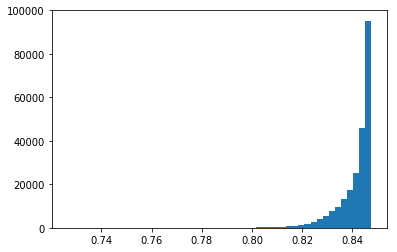

In [220]:
plt.hist(np.log1p(np.log1p(np.log1p(y_pred))), bins=50)

(array([4.00000e+00, 1.40000e+01, 6.60000e+01, 2.33000e+02, 7.73000e+02,
        2.58400e+03, 9.48900e+03, 2.66000e+04, 6.23740e+04, 1.30689e+05]),
 array([ 1.38629436,  2.8594745 ,  4.33265464,  5.80583478,  7.27901492,
         8.75219506, 10.2253752 , 11.69855533, 13.17173547, 14.64491561,
        16.11809575]),
 <a list of 10 Patch objects>)

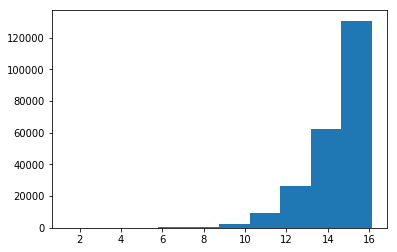

In [210]:
plt.hist(y_test.values)

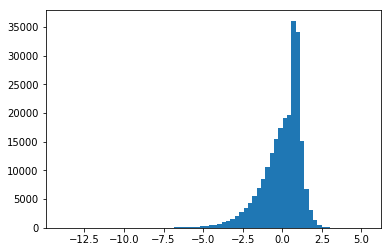

In [211]:
plt.hist(y_test.values[:, 0] - y_pred[:, 0], bins=70)
plt.show()